In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.load('/content/drive/MyDrive/LULC Research/indianpinearray.npy')
gt = np.load('/content/drive/MyDrive/LULC Research/IPgt.npy')
dataset = data
data.shape, gt.shape

((145, 145, 200), (145, 145))

In [ ]:
names = ['Other','Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

In [ ]:
import random
def visualize_data(data):
  """
  Create a plot to view the dataset
  """
  plt.figure(figsize=(10,7))
  n = 4
  rand_idx = random.sample(range(0, 200), n)
  for i in range(n):
    plt.subplot(int(n/2), int(n/2), i+1)
    plt.imshow(data[:, :, rand_idx[i]])
    plt.title(f'Sample Band: {rand_idx[i]+1}')

In [ ]:
def visualize_gt(gt):
  """
  Create a plot to view the ground truth of the dataset
  """
  plt.figure(figsize=(10,7))
  plt.imshow(gt)
  plt.title('Ground Truth')

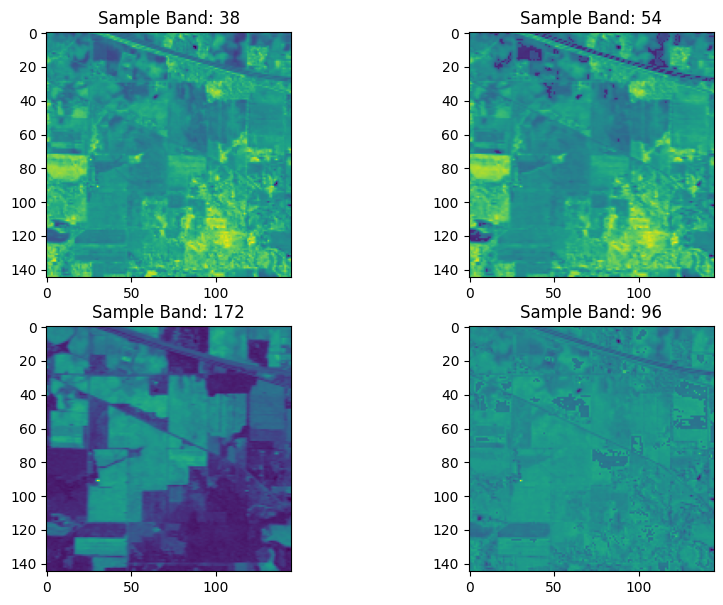

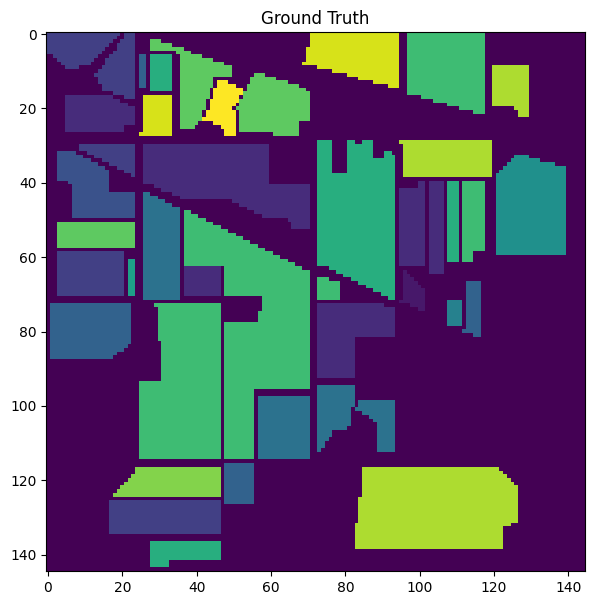

In [ ]:
visualize_data(data)
visualize_gt(gt)

Extracting the pixel values and consolidating them into a dataframe

In [ ]:
def extract_pixels(dataset, gt):
  df = pd.DataFrame()
  for i in range(dataset.shape[2]):
    df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
  df = pd.concat([df, pd.DataFrame(gt.ravel())], axis=1)
  df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])] + ['class']
  return df

In [ ]:
df = extract_pixels(data, gt)
df.tail()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,...,1013,1012,1018,1015,1011,1001,1000,1009,1008,0
21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,...,1012,1014,1012,1024,998,1010,1006,1000,1000,0
21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,...,1016,1015,1016,1021,1008,1019,1003,1008,1000,0
21023,3155,4104,4106,4027,4139,4318,4413,4174,4140,3933,...,1005,1011,1008,1012,1014,1007,1011,1005,1003,0
21024,3323,3860,4197,3952,4148,4279,4375,4225,3988,3866,...,1018,1014,1007,1015,1002,1010,1007,1004,1000,0


In [ ]:
def min_max_norm(df):
  ##Min Max Normalization of all values

  for col in df.columns[:-1]:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val)/(max_val - min_val)

  return df

In [ ]:
df = min_max_norm(df)

In [ ]:
df.sample(5)

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
20777,0.215081,0.378583,0.068215,0.278435,0.034410,0.041539,0.051636,0.060755,0.026929,0.192562,...,0.069204,0.055172,0.056962,0.037736,0.094787,0.090909,0.101124,0.200000,0.400000,0
9089,0.322368,0.419440,0.278392,0.409065,0.259885,0.204638,0.223832,0.267886,0.252546,0.350662,...,0.304498,0.286207,0.287975,0.313208,0.336493,0.272727,0.308989,0.355556,0.672727,2
13187,0.315283,0.459638,0.140118,0.324043,0.130999,0.122834,0.127804,0.130659,0.128536,0.243964,...,0.138408,0.086207,0.091772,0.094340,0.161137,0.102767,0.123596,0.288889,0.490909,0
11404,0.578947,0.546952,0.442847,0.554899,0.441896,0.424822,0.402804,0.435140,0.439013,0.514603,...,0.415225,0.396552,0.398734,0.377358,0.398104,0.343874,0.398876,0.422222,0.581818,0
18257,0.083502,0.458979,0.270649,0.450169,0.260791,0.257136,0.253037,0.262022,0.276759,0.393302,...,0.339100,0.331034,0.325949,0.369811,0.341232,0.335968,0.415730,0.322222,0.690909,0


In [ ]:
print(f'Shape of data:', df.shape)
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Shape of data: (21025, 201)
Unique Class Labels: [ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]


In [ ]:
df.loc[:, 'class'].value_counts()

class
0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: count, dtype: int64

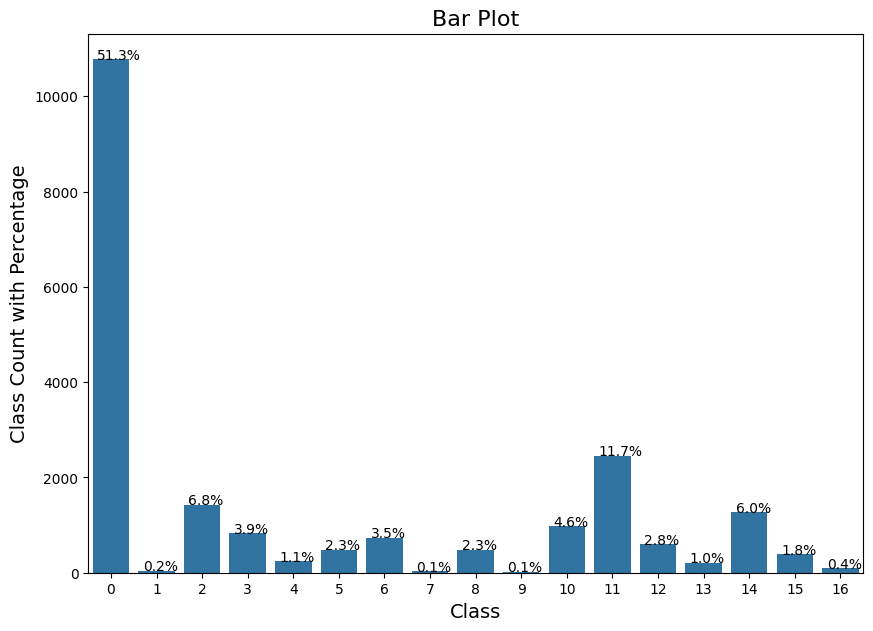

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,7))
ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))

plt.ylabel('Class Count with Percentage', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title('Bar Plot', fontsize=16)
plt.show()

In [ ]:
nir_band = 44
red_band = 29

ndvi = (df[f'band-{nir_band}'] - df[f'band-{red_band}'])/(df[f'band-{nir_band}'] + df[f'band-{red_band}'])
df.insert(200, "NDVI", ndvi, allow_duplicates=False)

<ipython-input-23-917bfbb464fa>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(200, "NDVI", ndvi, allow_duplicates=False)


In [ ]:
df.sample(10)

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,NDVI,class
17494,0.295547,0.374629,0.135693,0.301802,0.093269,0.069062,0.065888,0.060052,0.052501,0.187695,...,0.031034,0.031646,0.060377,0.090047,0.023715,0.123596,0.200000,0.418182,0.933305,14
2306,0.001012,0.515980,0.320428,0.435811,0.252641,0.242864,0.264019,0.262960,0.272007,0.368769,...,0.231034,0.227848,0.267925,0.279621,0.213439,0.252809,0.311111,0.527273,0.025879,0
7426,0.228239,0.422405,0.144174,0.282095,0.111681,0.069572,0.120561,0.112831,0.102059,0.238902,...,0.103448,0.075949,0.135849,0.094787,0.106719,0.151685,0.155556,0.418182,0.624954,6
18135,0.123988,0.334102,0.067847,0.280405,0.052520,0.042813,0.018224,0.040816,0.040959,0.163941,...,0.044828,0.025316,0.064151,0.056872,0.075099,0.078652,0.255556,0.345455,0.917375,0
2843,0.302126,0.305437,0.149336,0.288288,0.117114,0.075433,0.100935,0.077645,0.078751,0.209696,...,0.055172,0.028481,0.075472,0.075829,0.071146,0.123596,0.222222,0.600000,0.818556,0
9438,0.111336,0.464580,0.377950,0.492117,0.352852,0.325178,0.352103,0.350457,0.343290,0.467095,...,0.420690,0.417722,0.426415,0.473934,0.403162,0.471910,0.633333,0.600000,-0.109420,3
4611,0.307186,0.344975,0.181785,0.324324,0.094174,0.084098,0.097897,0.072250,0.062684,0.195288,...,0.065517,0.044304,0.037736,0.113744,0.051383,0.123596,0.222222,0.436364,0.903645,14
264,0.008097,0.430972,0.382006,0.449887,0.332629,0.298930,0.298832,0.319259,0.312740,0.420171,...,0.258621,0.224684,0.256604,0.241706,0.249012,0.247191,0.333333,0.527273,0.121384,0
5613,0.005061,0.424382,0.114676,0.279842,0.057350,0.055810,0.064252,0.073188,0.055442,0.187500,...,0.027586,0.072785,0.064151,0.090047,0.071146,0.073034,0.266667,0.345455,0.909436,14
655,0.219130,0.429654,0.115044,0.305462,0.117718,0.103466,0.114953,0.113066,0.108622,0.232477,...,0.124138,0.104430,0.135849,0.151659,0.142292,0.157303,0.322222,0.345455,0.632641,15


## Dimensionality Reduction

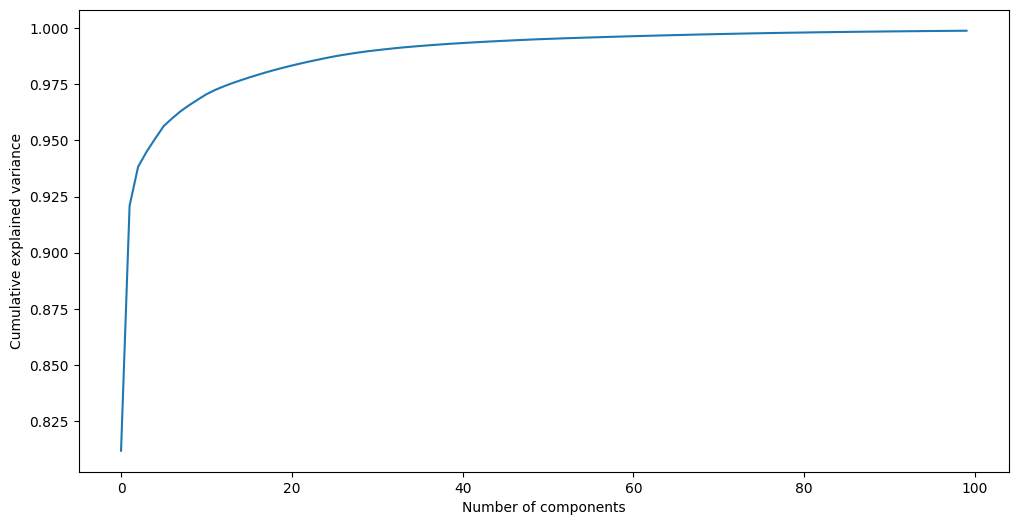

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

In [ ]:
pca = PCA(n_components = 40)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = gt.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,41)]+['class']

In [ ]:
q.sample(6)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
17845,0.325834,1.976317,-0.395021,0.296582,-0.057011,-0.079875,0.015338,0.120412,-0.026658,-0.314165,...,-0.015777,0.019628,0.069879,0.039005,0.031044,0.032036,-0.026716,0.037978,0.000264,0
20669,-2.627908,0.194497,0.050112,0.230192,-0.087979,-0.173960,0.045694,-0.046817,0.135515,0.066079,...,0.016853,0.005434,-0.041254,0.002716,-0.007038,-0.001930,-0.013569,0.027603,0.010181,0
11600,-2.611238,-1.216313,-0.002693,0.070901,-0.212133,-0.155757,-0.012474,0.208353,0.075344,0.002491,...,-0.031193,-0.014173,0.041627,-0.008281,-0.018749,0.000901,-0.022128,-0.013967,0.025622,0
7269,3.342118,-1.845932,0.441556,-0.041246,0.176427,-0.370893,-0.184368,-0.161019,-0.199210,0.144493,...,0.041697,0.007037,-0.115798,0.131004,-0.034465,-0.021702,0.016139,-0.015037,-0.037336,0
18301,2.904526,-0.903674,0.052285,-0.202049,-0.192808,-0.120924,0.222554,-0.024542,-0.082654,-0.111168,...,-0.029151,0.017182,-0.106840,0.075605,0.011646,-0.002265,-0.028441,-0.010689,-0.015050,3
6869,3.129983,-1.202831,0.327626,0.506112,0.369984,-0.070370,-0.039847,-0.180424,-0.006869,-0.059423,...,-0.001511,0.021937,-0.013645,0.086114,-0.018254,0.003620,0.030904,0.000731,-0.005174,2


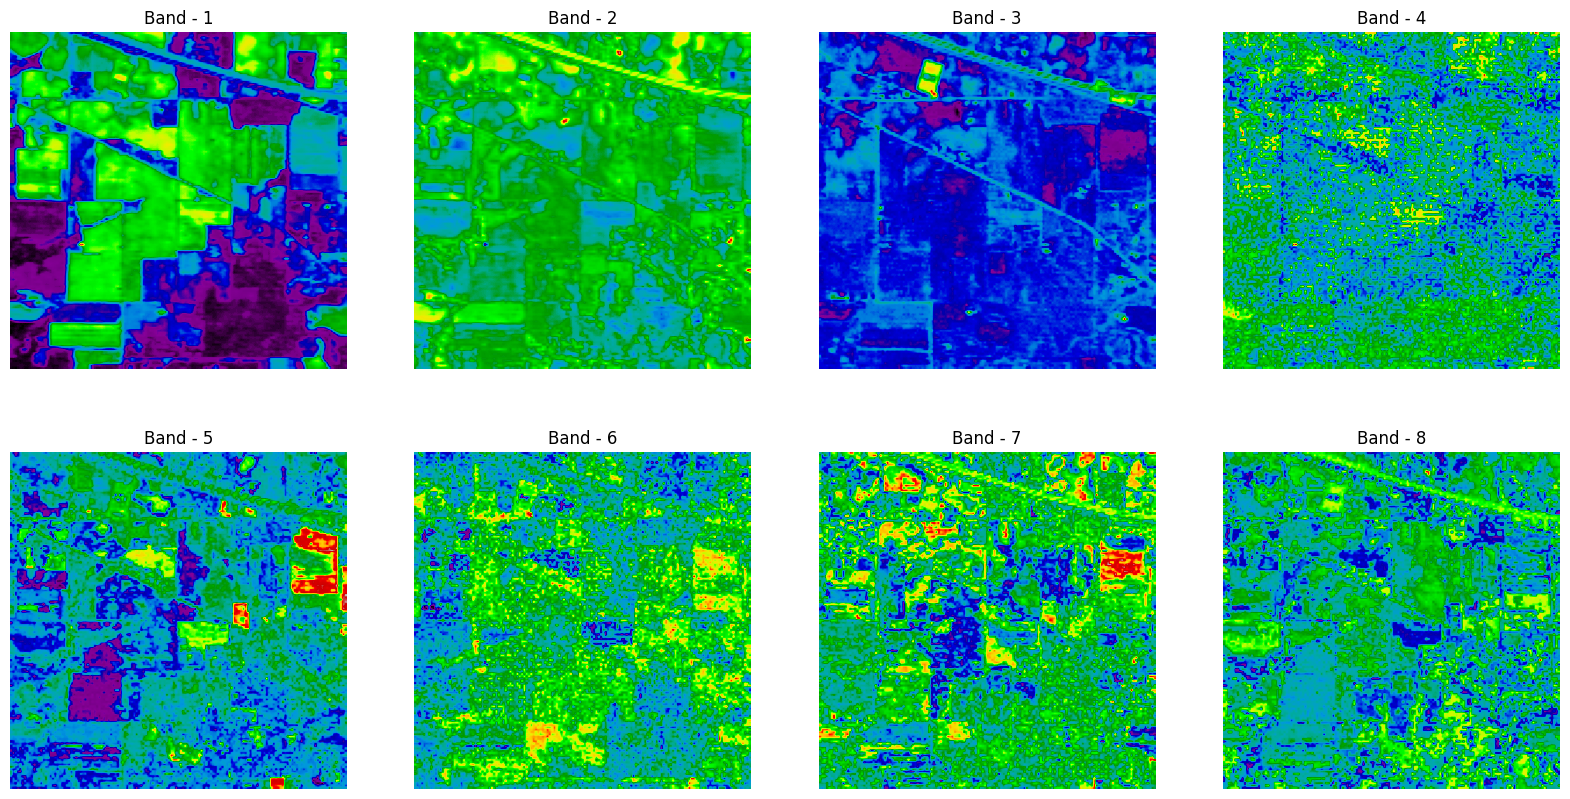

In [ ]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

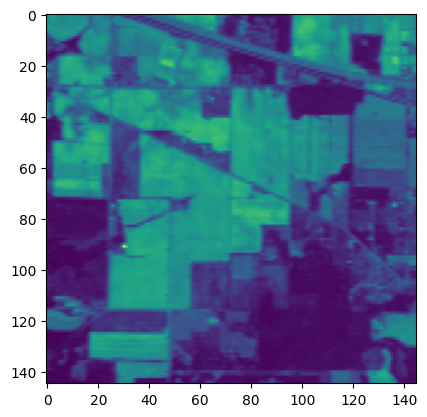

In [ ]:
data = q.iloc[:, :-1].to_numpy()
data = data.reshape((145, 145, 40))
dataset = data
plt.imshow(data[:, :, 0])

In [ ]:
import tensorflow as tf

data = tf.convert_to_tensor(data)
type(data)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
import numpy as np
from scipy.ndimage import rotate

def generate_patches_with_rotations(image, labels, patch_size=5):
    neighborhood_size = patch_size // 2

    # Pad the image to handle boundary cases
    padded_image = np.pad(image, ((neighborhood_size, neighborhood_size), (neighborhood_size, neighborhood_size), (0, 0)), mode='edge')
    padded_labels = np.pad(labels, neighborhood_size, mode='edge')

    patches = []
    labels_list = []

    for i in range(neighborhood_size, padded_image.shape[0] - neighborhood_size):
        for j in range(neighborhood_size, padded_image.shape[1] - neighborhood_size):
            # Extract the patch centered at the current pixel
            patch = padded_image[i-neighborhood_size:i+neighborhood_size+1, j-neighborhood_size:j+neighborhood_size+1]

            patches.append(patch)
            for angle in range(45, 360, 45):
                rotated_patch = rotate(patch, angle=angle, reshape=False, mode='nearest')
                patches.append(rotated_patch)

            label = padded_labels[i, j]
            for _ in range(8):  # Account for the original patch and its rotations
                labels_list.append(label)

    patches = np.array(patches)
    labels_arr = np.array(labels_list)

    # Shuffle the patches and labels
    indices = np.arange(len(patches))
    np.random.shuffle(indices)
    shuffled_patches = patches[indices]
    shuffled_labels = labels_arr[indices]
    return shuffled_patches, shuffled_labels

X, y = generate_patches_with_rotations(data, gt, patch_size=5)

In [ ]:
print("Shape of neighbor patches with rotations array:", X.shape)
print("Shape of neighbor patches label array:", y.shape)
np.save('patches_rot', X)
np.save('patches_labels', y)

### Model Creation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
X = np.load('/content/drive/MyDrive/patches_rot.npy')
y = np.load('/content/drive/MyDrive/patches_labels.npy')
X.shape, y.shape

((168200, 5, 5, 40), (168200,))

In [ ]:
epochs = 50
input_shape=(5, 5, 40)
batch_size = 32
learning_rate = 0.01
decay_rate = learning_rate / epochs
decay_steps = len(X) // batch_size * epochs

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False,
)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=input_shape),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(17, activation="softmax")
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

repetitions = 5
folds = 3

results = []

for _ in range(repetitions):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        desired_ratio = 0.1
        num_minority_samples = int(desired_ratio * len(y_train_fold))
        class_distribution = {label: sum(y_train_fold == label) for label in set(y_train_fold)}
        sampling_strategy = {label: num_minority_samples for label, count in class_distribution.items() if count < num_minority_samples}

        smote = SMOTE(sampling_strategy=sampling_strategy)
        X_train_fold = X_train_fold.reshape((-1, 1000))
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        X_train_fold_resampled = X_train_fold_resampled.reshape((-1, 5, 5, 40))
        history = model.fit(X_train_fold_resampled, y_train_fold_resampled,
                            epochs=10, batch_size=batch_size, callbacks=[callback])
        _, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=0)

        results.append(accuracy)

In [ ]:
accuracy = np.mean(results)

print("Accuracy:", accuracy)

Accuracy: 0.9790960550308228


In [ ]:
model.save('project-model-2.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 32)          11552     
                                                                 
 batch_normalization (Batch  (None, 5, 5, 32)          128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 batch_normalization_1 (Bat  (None, 2, 2, 64)          256       
 chNormalization)                                                
                                                        

In [ ]:
def generate_patches(image, patch_size=5):
    neighborhood_size = patch_size // 2

    # Pad the image to handle boundary cases
    padded_image = np.pad(image, ((neighborhood_size, neighborhood_size), (neighborhood_size, neighborhood_size), (0, 0)), mode='edge')

    patches = []

    for i in range(neighborhood_size, padded_image.shape[0] - neighborhood_size):
        for j in range(neighborhood_size, padded_image.shape[1] - neighborhood_size):
            # Extract the patch centered at the current pixel
            patch = padded_image[i-neighborhood_size:i+neighborhood_size+1, j-neighborhood_size:j+neighborhood_size+1]
            patches.append(patch)

    patches = np.array(patches)
    return patches

test = generate_patches(dataset)
test.shape

(21025, 5, 5, 40)

In [ ]:
y_preds = model.predict(test)

658/658 [==============================] - 1s 2ms/step


In [ ]:
y_preds = np.argmax(y_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(gt.reshape((21025)), y_preds)
print('Accuracy:', accuracy)

Accuracy: 0.9732223543400713


In [ ]:
y_preds = y_preds.reshape((145, 145))

Text(0.5, 1.0, 'Predictions')

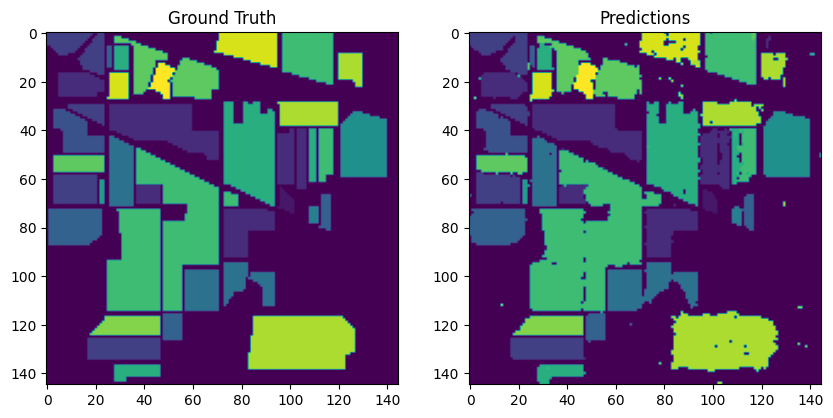

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plt.imshow(gt)
plt.title("Ground Truth")
plt.subplot(1, 2, 2)
plt.imshow(y_preds)
plt.title("Predictions")

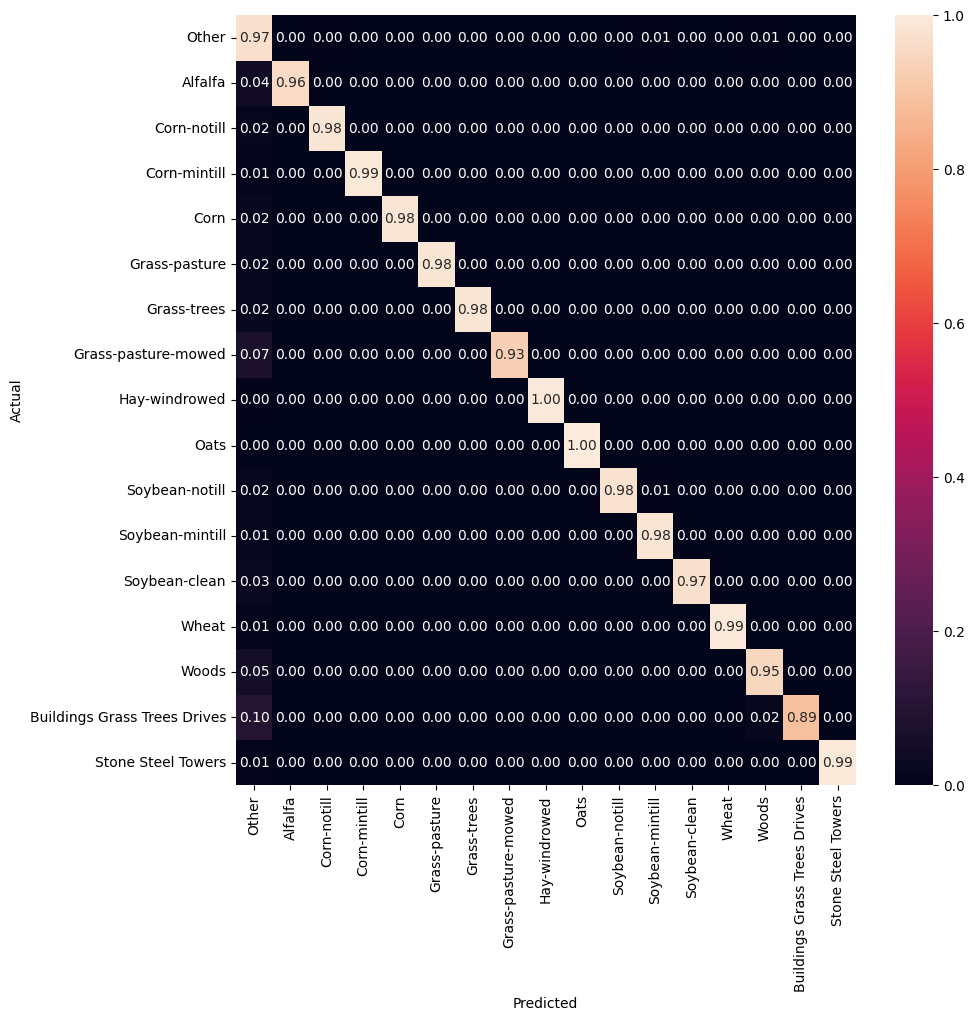

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(gt.reshape((21025,)), y_preds.reshape((21025,)))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=names, yticklabels=names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)